In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager

# palette
import seaborn as sns
sns.set_palette("pastel")

# 주피터 노트북
%matplotlib inline

# 한글 폰트
matplotlib.font_manager._rebuild()
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith("Malgun")])

# 폰트 설정
mpl.rc('font', family='Malgun Gothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [2]:
iris = sns.load_dataset('iris')
print(iris.shape)
iris.groupby(iris.species).describe()

(150, 5)


sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [59]:
iris = sns.load_dataset('iris')
grps = iris.groupby('species')

q1 = grps.quantile(.25)
q3 = grps.quantile(.75)

iqr = q3 - q1
qs = q1 - 1.5 * iqr
ql = q3 + 1.5 * iqr

uniques = iris['species'].unique()

for species in uniques:
    
    tmp = iris.query(
    """(species.str.contains('{0}')) \
        & (({1} < @qs.{1}.{0}) | ({1} > @ql.{1}.{0}) \
        | ({2} < @qs.{2}.{0}) | ({2} > @ql.{2}.{0}) \
        | ({3} < @qs.{3}.{0}) | ({3} > @ql.{3}.{0}) \
        | ({4} < @qs.{4}.{0}) | ({4} > @ql.{4}.{0})) \
    """.format(species, 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'), 
    engine='python')

    ids = tmp.index.to_list()

    print(ids)

    # for i in ids:
    #     iris['sepal_length'][i] = np.nan
    #     iris['sepal_width'][i] = np.nan
    #     iris['petal_length'][i] = np.nan
    #     iris['petal_width'][i] = np.nan

# iris[10:20]
# # iris[iris['species'] == 'setosa']
# # iris.drop(dropIdxs, inplace=True)
# # print(iris.shape)
# iris.groupby('species').agg(['mean', 'std'])

# data.append(tmp)
# pd.concat(data).groupby('species').agg(['mean', 'std']).T

[13, 15, 22, 23, 24, 41, 43, 44]
[98]
[106, 117, 119, 131]


In [110]:
qs, ql

(            sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa            4.2000       2.4875        1.1375         0.05
 versicolor        4.5500       1.8125        3.1000         0.75
 virginica         5.2125       2.2375        3.9375         1.05,
             sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa            5.8000       4.3875        1.8375         0.45
 versicolor        7.3500       3.7125        5.5000         1.95
 virginica         7.9125       3.7375        7.0375         3.05)

In [ ]:

# data = []
# for species, grp in grps:

#     if species not in 'setosa':
#         continue
    
    # iris[iris['species'].str.contains(species)]

    # print(species)

    # print(grp)
    # tmp = iris.query(f"""
    # (species in '{i}') \
    #     & ({qs['sepal_length'][i]} < sepal_length < {ql['sepal_length'][i]}) \
    #     & ({qs['sepal_width'][i]} < sepal_width < {ql['sepal_width'][i]}) \
    #     & ({qs['petal_length'][i]} < petal_length < {ql['petal_length'][i]}) \
    #     & ({qs['petal_width'][i]} < petal_width < {ql['petal_width'][i]})
    # """)
    # data.append(tmp)



    # print()
    # print(f""" {i} """)
    # print(f""" ({qs['sepal_length'][i]} < sepal_length < {ql['sepal_length'][i]}) """)
    # print(f""" ({qs['sepal_width'][i]} < sepal_width < {ql['sepal_width'][i]}) """)
    # print(f""" ({qs['petal_length'][i]} < petal_length < {ql['petal_length'][i]}) """)
    # print(f""" ({qs['petal_width'][i]} < petal_width < {ql['petal_width'][i]}) """)
    # print(tmp)

# pd.concat(data).groupby('species').agg(['mean', 'std'])

In [105]:
grps = pd.concat(data).groupby('species')
d1 = []

for i, g in grps:
    if i not in 'setosa':
        continue
    d1.append(g['sepal_width'])
    # print(g)

d1

[0     3.5
 1     3.0
 2     3.2
 3     3.1
 4     3.6
 5     3.9
 6     3.4
 7     3.4
 8     2.9
 9     3.1
 10    3.7
 11    3.4
 12    3.0
 14    4.0
 16    3.9
 17    3.5
 18    3.8
 19    3.8
 20    3.4
 21    3.7
 25    3.0
 26    3.4
 27    3.5
 28    3.4
 29    3.2
 30    3.1
 31    3.4
 32    4.1
 33    4.2
 34    3.1
 35    3.2
 36    3.5
 37    3.6
 38    3.0
 39    3.4
 40    3.5
 42    3.2
 45    3.0
 46    3.8
 47    3.2
 48    3.7
 49    3.3
 Name: sepal_width, dtype: float64]

In [70]:
iris.groupby(iris.species).agg(['mean', 'std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

### using tuple unpacking for multiple Axes

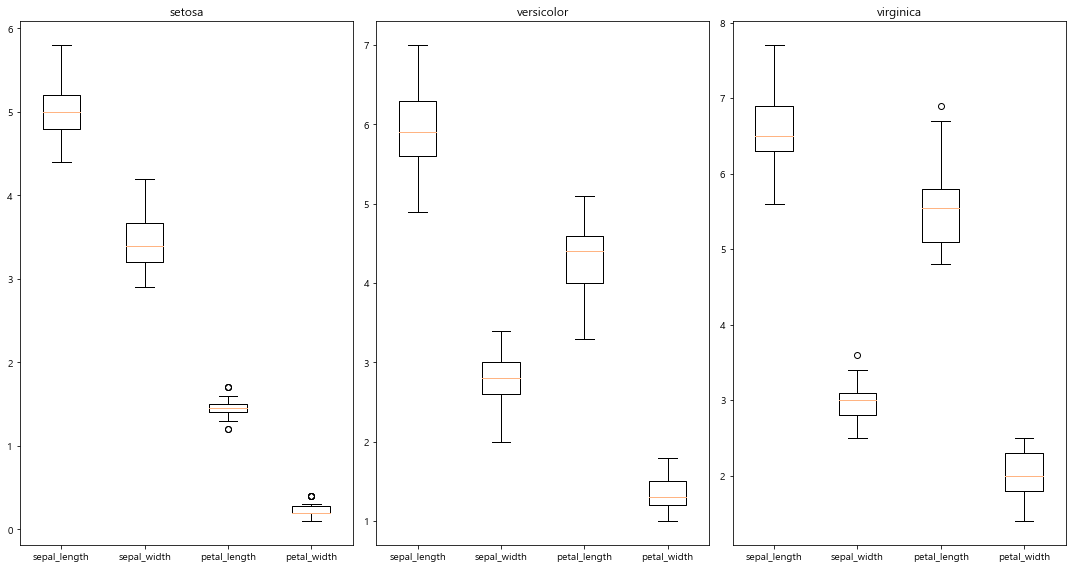

In [74]:
# using tuple unpacking for multiple Axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,8))

ax1.boxplot((data[0]['sepal_length'], data[0]['sepal_width'], data[0]['petal_length'], data[0]['petal_width']), labels=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
ax1.set_title("setosa")

ax2.boxplot((data[1]['sepal_length'], data[1]['sepal_width'], data[1]['petal_length'], data[1]['petal_width']), labels=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
ax2.set_title("versicolor")

ax3.boxplot((data[2]['sepal_length'], data[2]['sepal_width'], data[2]['petal_length'], data[2]['petal_width']), labels=['sepal_length', 'sepal_width', 'petal_length','petal_width'])
ax3.set_title("virginica")

plt.tight_layout()
plt.show()

### using the variable axs for multiple Axes

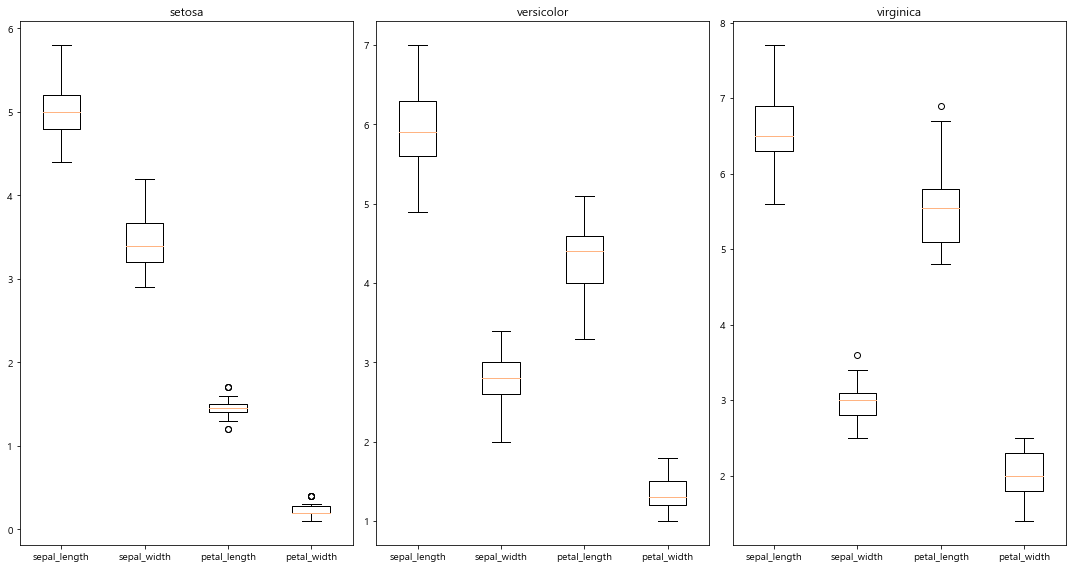

In [83]:
# using the variable axs for multiple Axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,8))

for i, v in enumerate(data):
    boxes = []; labels = []
    for c in data[i]:
        if c in 'species':
            continue
        boxes.append(data[i][c]); labels.append(c)
    axes[i].boxplot(boxes, labels=labels)
    axes[i].set_title(''.join(data[i]['species'].unique()))

plt.tight_layout()
plt.show()